In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib as plt
import statsmodels.api
import matplotlib.pyplot as plt
import sklearn.metrics
from statsmodels.formula.api import logit as logit
from sklearn.linear_model import LogisticRegression

In [2]:
data17 = pd.read_csv(r'C:\Users\Admin\Documents\NBA-2017.csv')
data18 = pd.read_csv(r'C:\Users\Admin\Documents\NBA-2018.csv')
data19 = pd.read_csv(r'C:\Users\Admin\Documents\NBA-2019.csv')
data20 = pd.read_csv(r'C:\Users\Admin\Documents\NBA-2020.csv')
data21 = pd.read_csv(r'C:\Users\Admin\Documents\NBA-2021.csv')

In [3]:
data17.head()

,Rk,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1.0,Golden State Warriors*,82,241.2,43.1,87.1,0.495,12.0,31.2,0.383,...,0.788,9.4,35.0,44.4,30.4,9.6,6.8,14.8,19.3,115.9
1,2.0,Houston Rockets*,82,241.2,40.3,87.2,0.462,14.4,40.3,0.357,...,0.766,10.9,33.5,44.4,25.2,8.2,4.3,15.1,19.9,115.3
2,3.0,Denver Nuggets,82,240.9,41.2,87.7,0.469,10.6,28.8,0.368,...,0.774,11.8,34.6,46.4,25.3,6.9,3.9,15.0,19.1,111.7
3,4.0,Cleveland Cavaliers*,82,242.4,39.9,84.9,0.470,13.0,33.9,0.384,...,0.748,9.3,34.4,43.7,22.7,6.6,4.0,13.7,18.1,110.3
4,5.0,Washington Wizards*,82,242.1,41.3,87.0,0.475,9.2,24.8,0.372,...,0.784,10.3,32.6,42.9,23.9,8.5,4.1,14.2,21.3,109.2


In [4]:
remove = ['Rk','G', 'MP','FG%', '3P%', '2P%', 'FT%', 'TRB']
data17 = data17.drop(remove, axis=1)
data18 = data18.drop(remove, axis=1)
data19 = data19.drop(remove, axis=1)
data20 = data20.drop(remove, axis=1)
data21 = data21.drop(remove, axis=1)
data17.head(3)

,Team,FG,FGA,3P,3PA,2P,2PA,FT,FTA,ORB,DRB,AST,STL,BLK,TOV,PF,PTS
0,Golden State Warriors*,43.1,87.1,12.0,31.2,31.1,55.8,17.8,22.6,9.4,35.0,30.4,9.6,6.8,14.8,19.3,115.9
1,Houston Rockets*,40.3,87.2,14.4,40.3,25.9,46.9,20.3,26.5,10.9,33.5,25.2,8.2,4.3,15.1,19.9,115.3
2,Denver Nuggets,41.2,87.7,10.6,28.8,30.6,58.9,18.7,24.2,11.8,34.6,25.3,6.9,3.9,15.0,19.1,111.7


In [5]:
data17['CHIP'] = 0
data18['CHIP'] = 0
data19['CHIP'] = 0
data20['CHIP'] = 0

In [6]:
data17['CHIP'][0] = 1
data18['CHIP'][0] = 1
data19['CHIP'][7] = 1
data20['CHIP'][15] = 1
# Warriors won 2017 & 2018
# Raports won 2019
# Lakers won 2020

<ipython-input-6-8a2eab7ef0ae>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data17['CHIP'][0] = 1
<ipython-input-6-8a2eab7ef0ae>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data18['CHIP'][0] = 1
<ipython-input-6-8a2eab7ef0ae>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data19['CHIP'][7] = 1
<ipython-input-6-8a2eab7ef0ae>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the

In [7]:
for index, row in data17.iterrows():
    if '*' in data17['Team'][index]:
        data17['Team'][index] = data17['Team'][index].replace('*','')
    if '*' in data18['Team'][index]:
        data18['Team'][index] = data18['Team'][index].replace('*','')
    if '*' in data19['Team'][index]:
        data19['Team'][index] = data19['Team'][index].replace('*','')
    if '*' in data20['Team'][index]:
        data20['Team'][index] = data20['Team'][index].replace('*','')
    if '*' in data21['Team'][index]:
        data21['Team'][index] = data21['Team'][index].replace('*','')
        
#     if 'League Average' in data17, data18, data19, data20:
data17.drop([30], inplace= True)
data18.drop([30], inplace= True)
data19.drop([30], inplace= True)
data20.drop([30], inplace= True)
data21.drop([30], inplace= True)

<ipython-input-7-75e7533675e3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data17['Team'][index] = data17['Team'][index].replace('*','')
<ipython-input-7-75e7533675e3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data18['Team'][index] = data18['Team'][index].replace('*','')
<ipython-input-7-75e7533675e3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data19['Team'][index] = data19['Team'][index].replace('*','')
<ipython-inpu

In [8]:
training_data = data17
training_data = training_data.append(data18)
training_data = training_data.append(data19)
training_data = training_data.append(data20)
training_data.shape

(120, 18)

In [9]:
rename = {'3P':'P3', '3PA':'PA3', '2P':'P2', '2PA': 'PA2'}
data17 = data17.rename(columns= rename)
data18 = data18.rename(columns= rename)
data19 = data19.rename(columns= rename)
data20 = data20.rename(columns= rename)
data21 = data21.rename(columns= rename)
training_data = training_data.rename(columns= rename)

In [10]:
model1 = logit('CHIP ~ PTS + AST + TOV', data=training_data).fit()
model2 = logit('CHIP ~ PTS + AST + ORB + DRB + STL + TOV', data=training_data).fit()
model3 = logit('CHIP ~ P3 + ORB + DRB + AST + STL + BLK + TOV + PF + PTS', data=training_data).fit()

Optimization terminated successfully.
         Current function value: 0.095087
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.063901
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.061140
         Iterations 12


In [11]:
training_data['Pred1'] = model1.predict()
training_data['Pred2'] = model2.predict()
training_data['Pred3'] = model3.predict()

In [12]:
training_data.head(3)

,Team,FG,FGA,P3,PA3,P2,PA2,FT,FTA,ORB,...,AST,STL,BLK,TOV,PF,PTS,CHIP,Pred1,Pred2,Pred3
0,Golden State Warriors,43.1,87.1,12.0,31.2,31.1,55.8,17.8,22.6,9.4,...,30.4,9.6,6.8,14.8,19.3,115.9,1,0.570836,0.890893,0.849022
1,Houston Rockets,40.3,87.2,14.4,40.3,25.9,46.9,20.3,26.5,10.9,...,25.2,8.2,4.3,15.1,19.9,115.3,0,0.057913,0.046680,0.009609
2,Denver Nuggets,41.2,87.7,10.6,28.8,30.6,58.9,18.7,24.2,11.8,...,25.3,6.9,3.9,15.0,19.1,111.7,0,0.036608,0.000134,0.000048


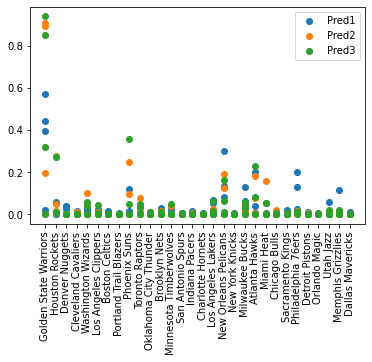

In [13]:
plt.scatter(training_data['Team'], training_data['Pred1'])
plt.scatter(training_data['Team'], training_data['Pred2'])
plt.scatter(training_data['Team'], training_data['Pred3'])
plt.xticks(rotation = 90) 
plt.legend(['Pred1', 'Pred2', 'Pred3'])


In [14]:
predictors = ['PTS', 'AST', 'P3', 'DRB', 'FG', 'TOV', 'BLK']
formula = 'CHIP ~ 1'
mse = []
import warnings

for pred in predictors:
    formula += ' + ' + pred
    print(formula)
    
    MSE = 0
    
    train_set = data17.append(data18).append(data19)
    test_set = data20    
    model = logit(formula=formula, data=train_set).fit()    
    yhat = model.predict(test_set)    
    MSE = sklearn.metrics.mean_squared_error(test_set['CHIP'], yhat)

#     warnings.filterwarnings("ignore")
    train_set = data17.append(data18).append(data20)
    test_set = data19        
    model = logit(formula=formula, data=train_set).fit(method='bfgs')    
    yhat = model.predict(test_set)    
    MSE += sklearn.metrics.mean_squared_error(test_set['CHIP'], yhat)
#     warnings.filterwarnings("ignore")
        
    train_set = data17.append(data19).append(data20)
    test_set = data18
    model = logit(formula=formula, data=train_set).fit()
    yhat = model.predict(test_set)
    MSE += sklearn.metrics.mean_squared_error(test_set['CHIP'], yhat)
    
    train_set = data18.append(data19).append(data20)
    test_set = data17        
    model = logit(formula=formula, data=train_set).fit()    
    yhat = model.predict(test_set)    
    MSE += sklearn.metrics.mean_squared_error(test_set['CHIP'], yhat)
    
    mse.append(MSE)

CHIP ~ 1 + PTS
Optimization terminated successfully.
         Current function value: 0.104026
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.118304
         Iterations: 25
         Function evaluations: 36
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 0.128595
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.134893
         Iterations 9
CHIP ~ 1 + PTS + AST
Optimization terminated successfully.
         Current function value: 0.073184
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.076924
         Iterations: 34
         Function evaluations: 43
         Gradient evaluations: 43
Optimization terminated successfully.
         Current function value: 0.116799
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.124197
         Iterations 9
CHIP ~

C:\Users\Admin\anaconda3.8\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.074245
         Iterations: 35
         Function evaluations: 44
         Gradient evaluations: 44
Optimization terminated successfully.
         Current function value: 0.111022
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.119040
         Iterations 9
CHIP ~ 1 + PTS + AST + P3 + DRB + FG
Optimization terminated successfully.
         Current function value: 0.071777
         Iterations 10


C:\Users\Admin\anaconda3.8\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.075960
         Iterations: 35
         Function evaluations: 44
         Gradient evaluations: 44
Optimization terminated successfully.
         Current function value: 0.111022
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.119039
         Iterations 9
CHIP ~ 1 + PTS + AST + P3 + DRB + FG + TOV


C:\Users\Admin\anaconda3.8\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.071345
         Iterations 10
         Current function value: 0.059054
         Iterations: 35
         Function evaluations: 44
         Gradient evaluations: 44
Optimization terminated successfully.
         Current function value: 0.105344
         Iterations 10


C:\Users\Admin\anaconda3.8\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.109072
         Iterations 9
CHIP ~ 1 + PTS + AST + P3 + DRB + FG + TOV + BLK
Optimization terminated successfully.
         Current function value: 0.058626
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.000001
         Iterations: 34
         Function evaluations: 43
         Gradient evaluations: 43


C:\Users\Admin\anaconda3.8\lib\site-packages\statsmodels\discrete\discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\Admin\anaconda3.8\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


Optimization terminated successfully.
         Current function value: 0.094498
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.093175
         Iterations 10


In [15]:
mse

[0.14392314153589925,
 0.12072332654607006,
 0.12199138912470059,
 0.1066489958817176,
 0.10889061816350754,
 0.11987833455680288,
 0.18192114548221883]

In [16]:
# the lowest mse is 0.1066..
# which is correlated with the model 
# CHIP ~ 1 + PTS + AST + P3 + DRB

In [17]:
mse = []
cols = ['PTS', 'AST', 'P3', 'DRB', 'FG', 'TOV', 'BLK']
c_vals = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

for reg_strength in c_vals:
    
    train_set = data17.append(data18).append(data19)
    test_set = data20    
    model = LogisticRegression(penalty= 'l2', C=reg_strength).fit(train_set[cols],train_set['CHIP'])    
    yhat = model.predict(test_set[cols])    
    MSE = sklearn.metrics.mean_squared_error(test_set['CHIP'], yhat)
        
    train_set = data17.append(data18).append(data20)
    test_set = data19        
    model = LogisticRegression(penalty= 'l2', C=reg_strength).fit(train_set[cols],train_set['CHIP'])    
    yhat = model.predict(test_set[cols])
    MSE += sklearn.metrics.mean_squared_error(test_set['CHIP'], yhat)
        
    train_set = data17.append(data19).append(data20)
    test_set = data18
    model = LogisticRegression(penalty= 'l2', C=reg_strength).fit(train_set[cols],train_set['CHIP'])    
    yhat = model.predict(test_set[cols])
    MSE += sklearn.metrics.mean_squared_error(test_set['CHIP'], yhat)
    
    train_set = data18.append(data19).append(data20)
    test_set = data17        
    model = LogisticRegression(penalty= 'l2', C=reg_strength).fit(train_set[cols],train_set['CHIP'])    
    yhat = model.predict(test_set[cols])
    MSE += sklearn.metrics.mean_squared_error(test_set['CHIP'], yhat)
    
    mse.append(MSE)

C:\Users\Admin\anaconda3.8\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Admin\anaconda3.8\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

C:\Users\Admin\anaconda3.8\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Admin\anaconda3.8\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

In [18]:
mse.index(min(mse))
# mse[6]

8

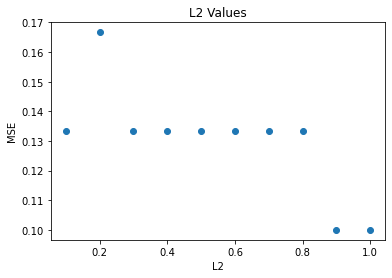

In [19]:
plt.scatter(c_vals,mse)
plt.title('L2 Values')
plt.xlabel('L2')
plt.ylabel('MSE')
plt.show()

In [20]:
c_vals[6]

0.7

In [21]:
final_model = LogisticRegression(penalty='l2',C=0.7).fit(training_data[cols], training_data['CHIP'])

C:\Users\Admin\anaconda3.8\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
testing_data = data21

In [23]:
final_predictions = final_model.predict_proba(testing_data[cols])[:,1]

In [24]:
final_predictions 

array([0.00473381, 0.07056361, 0.01334132, 0.00587838, 0.00682966,
       0.0245566 , 0.29265851, 0.04302723, 0.01634233, 0.00727894,
       0.01335992, 0.10938581, 0.07829441, 0.04999673, 0.02694242,
       0.03130182, 0.00410781, 0.15179008, 0.10598082, 0.00722778,
       0.01236516, 0.03242287, 0.10372542, 0.03153711, 0.02799275,
       0.00146754, 0.0481171 , 0.00180365, 0.00088129, 0.02528672])

In [25]:
max(final_predictions)

0.2926585084931947

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

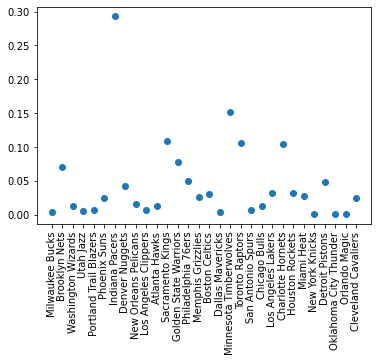

In [26]:
plt.scatter(testing_data['Team'], final_predictions)
plt.xticks(rotation = 90) 

In [27]:
testing_data['PRED'] = final_predictions 
testing_data = testing_data.sort_values('PRED', ascending=False)
testing_data['Order'] = range(1,31)

In [28]:
testing_data.head(5)

,Team,FG,FGA,P3,PA3,P2,PA2,FT,FTA,ORB,DRB,AST,STL,BLK,TOV,PF,PTS,PRED,Order
6,Indiana Pacers,43.3,91.2,12.3,34.0,30.9,57.3,16.4,20.7,9.0,33.7,27.4,8.5,6.4,13.5,20.2,115.3,0.292659,1
17,Minnesota Timberwolves,40.7,90.9,13.1,37.6,27.6,53.3,17.6,23.1,10.5,33.0,25.6,8.8,5.5,14.3,20.9,112.1,0.151790,2
11,Sacramento Kings,42.6,88.6,12.1,33.3,30.5,55.3,16.4,22.0,9.4,32.0,25.5,7.5,5.0,13.4,19.4,113.7,0.109386,3
18,Toronto Raptors,39.7,88.7,14.5,39.3,25.3,49.3,17.4,21.3,9.4,32.1,24.1,8.6,5.4,13.2,21.2,111.3,0.105981,4
22,Charlotte Hornets,39.9,87.8,13.7,37.0,26.3,50.8,15.9,20.9,10.6,33.2,26.8,7.8,4.8,14.8,18.0,109.5,0.103725,5


In [29]:
testing_data_playoffs = data21

# must drop and rename
playoff_teams = ['Brooklyn Nets',
                 'Denver Nuggets',
                 'Memphis Grizzlies',
                 'Philadelphia 76ers',
                 'Phoenix Suns',
                 'Milwaukee Bucks',
                 'Boston Celtics',
                 'Washington Wizards',
                 'Los Angeles Lakers',
                 'Utah Jazz',
                 'Atlanta Hawks',
                 'Los Angeles Clippers',
                 'Portland Trail Blazers',
                 'Miami Heat',
                 'Dallas Mavericks',
                 'New York Knicks']

testing_data_playoffs = testing_data_playoffs[testing_data_playoffs['Team'].isin(playoff_teams)]

testing_data_playoffs.head(5)

,Team,FG,FGA,P3,PA3,P2,PA2,FT,FTA,ORB,DRB,AST,STL,BLK,TOV,PF,PTS,PRED
0,Milwaukee Bucks,44.7,91.8,14.4,37.1,30.3,54.7,16.2,21.4,10.3,37.8,25.5,8.1,4.6,13.8,17.3,120.1,0.004734
1,Brooklyn Nets,43.1,87.3,14.2,36.1,29.0,51.2,18.1,22.5,8.9,35.5,26.8,6.7,5.3,13.5,19.0,118.6,0.070564
2,Washington Wizards,43.2,90.9,10.2,29.0,33.0,61.9,20.1,26.2,9.7,35.5,25.5,7.3,4.1,14.4,21.6,116.6,0.013341
3,Utah Jazz,41.3,88.1,16.7,43.0,24.5,45.1,17.2,21.5,10.6,37.6,23.7,6.6,5.2,14.2,18.5,116.4,0.005878
4,Portland Trail Blazers,41.3,91.1,15.7,40.8,25.6,50.3,17.8,21.6,10.6,33.9,21.3,6.9,5.0,11.1,18.9,116.1,0.006830


In [30]:
len(testing_data_playoffs['Team'])

16

In [31]:
final_model.coef_

array([[ 0.21893781,  0.43832416, -0.04256455, -0.62192861, -0.32906979,
         0.28694816,  0.9277516 ]])

In [32]:
final_predictions_playoffs = final_model.predict_proba(testing_data_playoffs[cols])[:,1]
testing_data_playoffs['PRED'] = final_predictions_playoffs
testing_data_playoffs = testing_data_playoffs.sort_values('PRED', ascending= False)
testing_data_playoffs['Order'] = range(1,17)
# testing_data_playoffs

<ipython-input-32-9e44da3e52c3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testing_data_playoffs['PRED'] = final_predictions_playoffs


In [33]:
final_prediction_playoffs = final_model.predict_proba(testing_data_playoffs[cols])[:,1]
testing_data_playoffs['PRED'] = final_prediction_playoffs
testing_data_playoffs = testing_data_playoffs.sort_values('PRED', ascending=False)
testing_data_playoffs['Order'] = range(1,17)
# testing_data_playoffs.head(5)

In [34]:
testing_data_playoffs['REL_PRED']= (testing_data_playoffs['PRED']/sum(testing_data_playoffs['PRED']))*100
# testing_data_playoffs.head(5)

In [35]:
sum(testing_data_playoffs['REL_PRED'])
testing_data_playoffs = testing_data_playoffs.rename({'REL_PRED':'REL_PERC'})

In [36]:
testing_data_playoffs[['Team','Order','REL_PRED']]

,Team,Order,REL_PRED
1,Brooklyn Nets,1,19.396190
13,Philadelphia 76ers,2,13.742864
7,Denver Nuggets,3,11.827122
21,Los Angeles Lakers,4,8.912244
15,Boston Celtics,5,8.604097
24,Miami Heat,6,7.694514
14,Memphis Grizzlies,7,7.405804
5,Phoenix Suns,8,6.750000
10,Atlanta Hawks,9,3.672311
2,Washington Wizards,10,3.667199


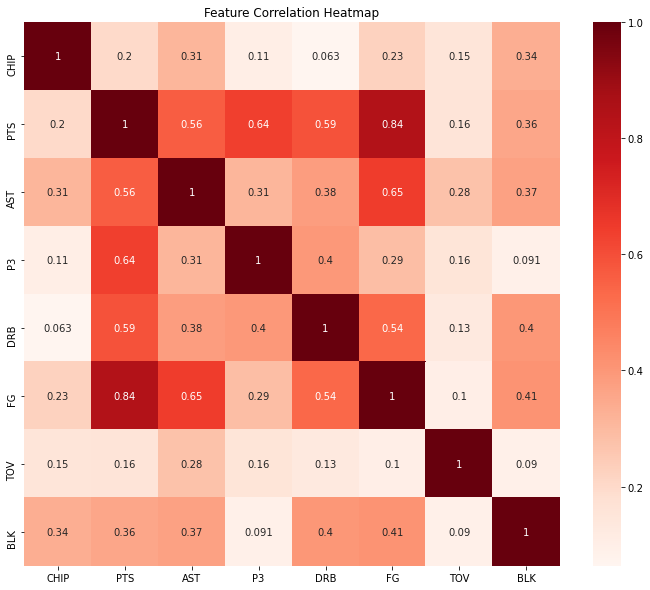

In [37]:
plt.figure(figsize=(12,10))
cor= training_data[['CHIP','PTS', 'AST', 'P3', 'DRB', 'FG', 'TOV', 'BLK']].corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.title('Feature Correlation Heatmap')
plt.show()
# Most Correlation: PTS & FG 

In [38]:
testing_data_playoffs['FTE_PRED'] = [16,3,1,22,3,9,1,1,10,20,1,12,1,1,1,1]

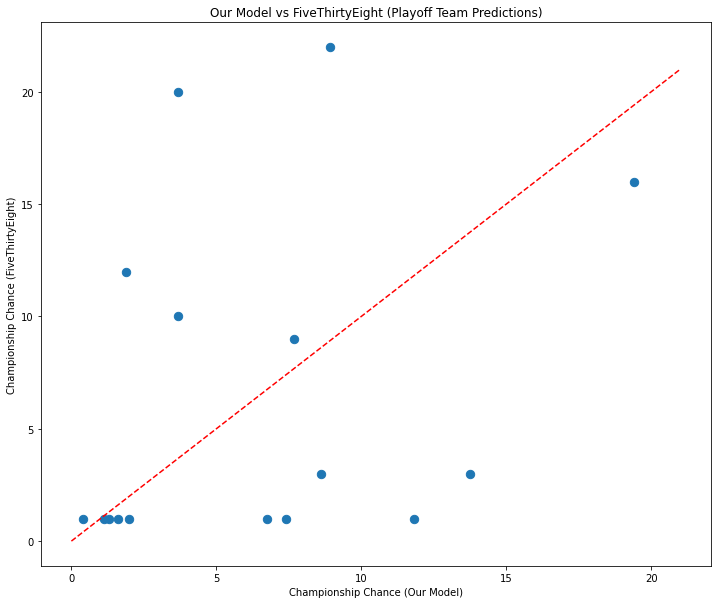

In [39]:
plt.figure(figsize=(12,10))
plt.scatter(testing_data_playoffs['REL_PRED'], testing_data_playoffs['FTE_PRED'], s=70)
plt.title('Our Model vs FiveThirtyEight (Playoff Team Predictions)')
plt.xlabel('Championship Chance (Our Model)')
plt.ylabel('Championship Chance (FiveThirtyEight)')
plt.plot(range(0,22), range(0,22),'r--')
plt.show()
